<a href="https://www.kaggle.com/code/golammostofas/nlp-with-spacy-details?scriptVersionId=166494975" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# What’s spaCy?
spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

If you’re working with a lot of text, you’ll eventually want to know more about it. For example, what’s it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?


# Install requirements

In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


# import spacy

## What is spaCy?
In the world of Natural Language Processing (NLP), spaCy has emerged as a powerful and efficient library, revolutionizing the way developers and researchers work with text data.

In [2]:
import spacy

# PIPELINE
1. en_core_web_trfRELEASE: English transformer pipeline (Transformer(name=‘roberta-base’, piece_encoder=‘byte-bpe’, stride=104, type=‘roberta’, width=768, window=144, vocab_size=50265)). Components: transformer, tagger, parser, ner, attribute_ruler, lemmatizer.

2. en_core_web_lg: English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.




In [3]:
#check complatelly install successful or not
nlp = spacy.load('en_core_web_sm')

In [4]:
with open ('/kaggle/input/nlp-test/wiki_us.txt', 'r') as f:
    text = f.read()

In [5]:
print(text)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

# Sample Spacy Pipline for NER

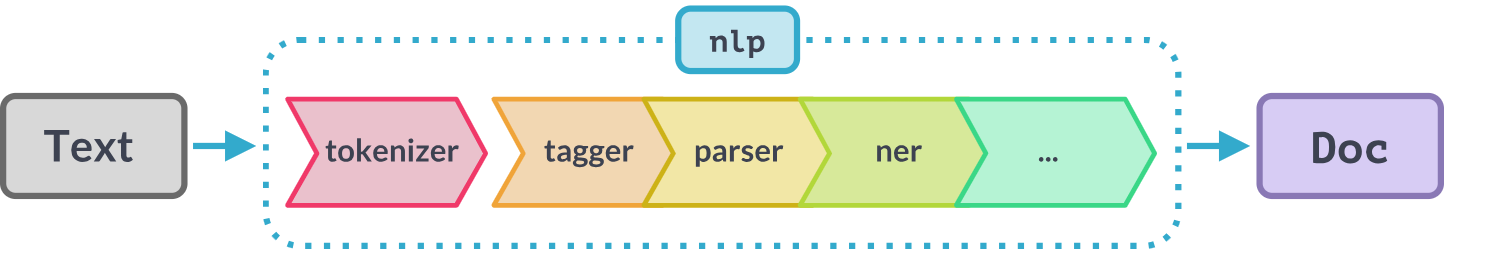

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline





NAME ->	COMPONENT -> CREATES -> DESCRIPTION


1. tokenizer -> Tokenizer -> Doc -> Segment text into tokens.
		
2. tagger -> Tagger -> Token.tag -> Assign part-of-speech tags.
3. parser -> DependencyParser -> Token.head, Token.dep, Doc.sents, Doc.noun_chunks -> Assign dependency labels.
4. ner -> EntityRecognizer -> Doc.ents, Token.ent_iob, Token.ent_type -> Detect and label named entities.
5. lemmatizer -> Lemmatizer -> Token.lemma -> Assign base forms.
6. textcat -> TextCategorizer -> Doc.cats -> Assign document labels.
7. custom -> custom components -> Doc._.xxx, Token._.xxx, Span._.xxx -> Assign custom attributes, methods or properties.

[reference](https://spacy.io/usage/processing-pipelines)

In [6]:
doc = nlp(text)

In [7]:
doc

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

## difference text and doc

In [8]:
#difference:

print(f'len of text:  {len(text)} and doc: {len(doc)}')

len of text:  3521 and doc: 654


In [9]:
for token in text[0:10]:
    print(token)

T
h
e
 
U
n
i
t
e
d


In [10]:
for token in doc[0:10]:
    print(token)

The
United
States
of
America
(
U.S.A.
or
USA
)


In [11]:
for token in text.split()[0:10]:
    print(token)

The
United
States
of
America
(U.S.A.
or
USA),
commonly
known


## Sentence Boundary Detection

In NLP sentence boundary detection or SBD is the identification of sentences in a text.

In [12]:
for sent in doc.sents:
    print(sent)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22]
With a population of more than 331 million people, it is the third most populous country in the world.
The national capital is Washington, D.C., and the most populous city is New York.


Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
The United States emerged from the thirteen British colonies es

In [13]:
sentence1 = list(doc.sents)[0] # we can't use doc.sents[0] because of this is generator
sentence1

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.

In [14]:
token2 = sentence1[2]
token2

States

In [15]:
token2.text

'States'

In [16]:
token2.left_edge

The

In [17]:
token2.right_edge

America

In [18]:
token2.ent_type

384

In [19]:
token2.ent_type_

'GPE'

 N.B: GPE stands for Geopolitical Entities.

In [20]:
 token2.morph

Number=Sing

In [21]:
sentence1[12].morph

Aspect=Perf|Tense=Past|VerbForm=Part

In [22]:
token2.pos_

'PROPN'

PROPN - Proper Noune

In [23]:
token2.dep_

'nsubj'

nsubj - Noune Subject

In [24]:
token2.lang_

'en'

In [25]:
text = 'Mike enjoy playing football'
doc2 = nlp(text)

doc2

Mike enjoy playing football

In [26]:
for token in doc2:
    print(token.text, token.pos_, token.dep_)

Mike PROPN nsubj
enjoy VERB ROOT
playing VERB xcomp
football NOUN dobj


In [27]:
from spacy import displacy
displacy.render(doc2, style='dep')

This is syntactic dependency tree, where represent the grammatical structure of a sentence or a piece of text

In [28]:
for ent in doc.ents:
    print(ent.text, '-', ent.label_)

The United States of America - GPE
U.S.A. - GPE
USA - GPE
the United States - GPE
U.S. - GPE
US - GPE
America - GPE
North America - LOC
50 - CARDINAL
five - CARDINAL
326 - CARDINAL
Indian - NORP
3.8 million square miles - QUANTITY
9.8 million square kilometers - QUANTITY
fourth - ORDINAL
The United States - GPE
Canada - GPE
Mexico - GPE
Bahamas - GPE
Cuba - GPE
more than 331 million - CARDINAL
third - ORDINAL
Washington - GPE
D.C. - GPE
New York - GPE
Paleo-Indians - NORP
Siberia - LOC
North American - NORP
at least 12,000 years ago - DATE
European - NORP
the 16th century - DATE
The United States - GPE
thirteen - CARDINAL
British - NORP
the East Coast - LOC
Great Britain - GPE
the American Revolutionary War - ORG
the late 18th century - DATE
U.S. - GPE
North America - LOC
Native Americans - NORP
1848 - DATE
the United States - GPE
United States - GPE
the second half of the 19th century - DATE
the American Civil War - ORG
Spanish - NORP
World War - EVENT
U.S. - GPE
World War II - EVENT


In [29]:
displacy.render(doc, style='ent')

In [30]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 18.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [31]:
nlp = spacy.load('en_core_web_md')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [32]:
import numpy as np
your_word = 'country'
ms = nlp.vocab.vectors.most_similar(
    np.asarray([nlp.vocab.vectors[nlp.vocab.strings[your_word]]]), 
    n=10
)
print('ms \n', ms)
words = [nlp.vocab.strings[w] for w in ms[0][0]]
print('words: ', words)

ms 
 (array([[12389239844680878404,  1435501296278296988,  3205366385982613224,
        10101261077591962824, 10067128433980916117, 13467190378500458811,
         7523086094447079607,  4411440909759659592,  3830018849180425586,
          769100778973147158]], dtype=uint64), array([[  351,  1831,   919,  8453,  4341, 10117,  1955, 14035,   984,
        17926]], dtype=int32), array([[1.    , 0.8009, 0.7833, 0.773 , 0.7341, 0.712 , 0.6996, 0.6951,
        0.6934, 0.6924]], dtype=float32))
words:  ['country—0,467', 'nationâ\x80\x99s', 'countries-', 'continente', 'Carnations', 'pastille', 'бесплатно', 'Argents', 'Tywysogion', 'Teeters']


In [33]:
doc2 = nlp('I enjoy oranges')
doc3 = nlp('I enjoy apples')

print(doc2, ' == ', doc3, ' is ', doc2.similarity(doc3))

I enjoy oranges  ==  I enjoy apples  is  0.9703841579038354


# Customize pipelines

In [34]:
# creating blank model with English language
nlp = spacy.blank('en') 
nlp

In [35]:
nlp.pipe_names

[]

# sentencizer
A simple pipeline component to allow custom sentence boundary detection logic that doesn’t require the dependency parse. By default, sentence segmentation is performed by the DependencyParser, so the Sentencizer lets you implement a simpler, rule-based strategy that doesn’t require a statistical model to be loaded

A transition-based dependency parser component. The dependency parser jointly learns sentence segmentation and labelled dependency parsing, and can optionally learn to merge tokens that had been over-segmented by the tokenizer.

In [36]:
nlp.add_pipe('sentencizer')
nlp

In [37]:
nlp.pipe_names

['sentencizer']

In [38]:
nlp.analyze_pipes()

{'summary': {'sentencizer': {'assigns': ['token.is_sent_start', 'doc.sents'],
   'requires': [],
   'scores': ['sents_f', 'sents_p', 'sents_r'],
   'retokenizes': False}},
 'problems': {'sentencizer': []},
 'attrs': {'token.is_sent_start': {'assigns': ['sentencizer'], 'requires': []},
  'doc.sents': {'assigns': ['sentencizer'], 'requires': []}}}

In [39]:
nlp2 = spacy.load('en_core_web_sm')

In [40]:
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'tok2vec': [],
  'tagger': [],
  'parser': [],
  'attribute_ruler': [],
  'lemmatizer': [],
  'ner': []},
 'att

# SpaCy's EntityRule
The entity ruler lets you add spans to the Doc.ents using token-based rules or exact phrase matches. It can be combined with the statistical EntityRecognizer to boost accuracy, or used on its own to implement a purely rule-based entity recognition system.

In [41]:
nlp = spacy.load('en_core_web_sm')
text = 'West Chestertenfielddville was referenced in Mr. Deeds.'

In [42]:
doc = nlp(text)

In [43]:
for ent in doc.ents:
    print(ent, ent.label_)

West Chestertenfielddville PERSON
Deeds PERSON


Those are person. now we are set different rule at this person

In [44]:
ruler = nlp.add_pipe('entity_ruler')

In [45]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [46]:
patterns = [
    {'label': 'GPE', 'pattern': 'West Chestertenfielddville'}
]

ruler.add_patterns(patterns)

In [47]:
nlp.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [48]:
doc2 = nlp(text)
for ent in doc2.ents:
    print(ent, ent.label_)

West Chestertenfielddville PERSON
Deeds PERSON


In [49]:
nlp2 = spacy.load('en_core_web_sm')

In [50]:
ruler = nlp2.add_pipe('entity_ruler', before='ner')

In [51]:
ruler.add_patterns(patterns)

In [52]:
nlp2.analyze_pipes()

{'summary': {'tok2vec': {'assigns': ['doc.tensor'],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'tagger': {'assigns': ['token.tag'],
   'requires': [],
   'scores': ['tag_acc'],
   'retokenizes': False},
  'parser': {'assigns': ['token.dep',
    'token.head',
    'token.is_sent_start',
    'doc.sents'],
   'requires': [],
   'scores': ['dep_uas',
    'dep_las',
    'dep_las_per_type',
    'sents_p',
    'sents_r',
    'sents_f'],
   'retokenizes': False},
  'attribute_ruler': {'assigns': [],
   'requires': [],
   'scores': [],
   'retokenizes': False},
  'lemmatizer': {'assigns': ['token.lemma'],
   'requires': [],
   'scores': ['lemma_acc'],
   'retokenizes': False},
  'entity_ruler': {'assigns': ['doc.ents', 'token.ent_type', 'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False},
  'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
   'requires': [],
   'scores': ['ents_f', 'ent

In [53]:
doc = nlp2(text)

In [54]:
for ent in doc.ents:
    print(ent.text, ent.label_)

West Chestertenfielddville GPE
Deeds PERSON


In [55]:
nlp3 = spacy.load('en_core_web_sm')

In [56]:
ruler = nlp3.add_pipe('entity_ruler', before='ner')

In [57]:
patterns = [
    {'label': 'GPE', 'pattern': 'West Chestertenfielddville'},
    {'label': 'FLIM', 'pattern': 'Mr. Deeds'}

]

ruler.add_patterns(patterns)

In [58]:
doc = nlp3(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

West Chestertenfielddville GPE
Mr. Deeds FLIM


# How to use the spacy Matcher

The Matcher lets you find words and phrases using rules describing their token attributes. Rules can refer to token annotations (like the text or part-of-speech tags), as well as lexical attributes like Token.is_punct.


A pattern added to the Matcher consists of a list of dictionaries. Each dictionary describes one token and its attributes. The available token pattern keys correspond to a number of Token attributes

In [59]:
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

In [60]:
print(matcher)

In [61]:
# Add match ID "emailAddress" with no callback and one pattern'
pattern = [{'LIKE_EMAIL': True}]
matcher.add("emailAddress", [pattern])

In [62]:
doc = nlp("this is an email address: golammostofa10001@gmail.com")
matches = matcher(doc)

matches

[(14702064630154240274, 6, 7)]

In [63]:
print(nlp.vocab[matches[0][0]].text)

emailAddress


In [64]:
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

14702064630154240274 emailAddress 6 7 golammostofa10001@gmail.com


In [65]:
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", [pattern])

doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


In [66]:
with open('/kaggle/input/nlp-test/wiki_mlk.txt', 'r') as f:
    text = f.read()

In [67]:
print(text)

Martin Luther King Jr. (born Michael King Jr.; January 15, 1929 – April 4, 1968) was an American Baptist minister and activist who became the most visible spokesman and leader in the American civil rights movement from 1955 until his assassination in 1968. King advanced civil rights through nonviolence and civil disobedience, inspired by his Christian beliefs and the nonviolent activism of Mahatma Gandhi. He was the son of early civil rights activist and minister Martin Luther King Sr.

King participated in and led marches for blacks' right to vote, desegregation, labor rights, and other basic civil rights.[1] King led the 1955 Montgomery bus boycott and later became the first president of the Southern Christian Leadership Conference (SCLC). As president of the SCLC, he led the unsuccessful Albany Movement in Albany, Georgia, and helped organize some of the nonviolent 1963 protests in Birmingham, Alabama. King helped organize the 1963 March on Washington, where he delivered his famous 

In [68]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

pattern = [{"POS": "PROPN"}]
matcher.add("PROPN_NOUN", [pattern])

doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

102
12297725819001071383 PROPN_NOUN 0 1 Martin
12297725819001071383 PROPN_NOUN 1 2 Luther
12297725819001071383 PROPN_NOUN 2 3 King
12297725819001071383 PROPN_NOUN 3 4 Jr.
12297725819001071383 PROPN_NOUN 6 7 Michael
12297725819001071383 PROPN_NOUN 7 8 King
12297725819001071383 PROPN_NOUN 8 9 Jr.
12297725819001071383 PROPN_NOUN 10 11 January
12297725819001071383 PROPN_NOUN 15 16 April
12297725819001071383 PROPN_NOUN 23 24 Baptist
12297725819001071383 PROPN_NOUN 49 50 King
12297725819001071383 PROPN_NOUN 69 70 Mahatma
12297725819001071383 PROPN_NOUN 70 71 Gandhi
12297725819001071383 PROPN_NOUN 83 84 Martin
12297725819001071383 PROPN_NOUN 84 85 Luther
12297725819001071383 PROPN_NOUN 85 86 King
12297725819001071383 PROPN_NOUN 86 87 Sr
12297725819001071383 PROPN_NOUN 87 88 .
12297725819001071383 PROPN_NOUN 89 90 King
12297725819001071383 PROPN_NOUN 113 114 King
12297725819001071383 PROPN_NOUN 117 118 Montgomery
12297725819001071383 PROPN_NOUN 128 129 Southern
12297725819001071383 PROPN_NOUN 

In [69]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

pattern = [{"POS": "PROPN", 'OP': '+'}]
matcher.add("PROPN_NOUN", [pattern])

doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match_id, start, end in matches[:10]:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

175
12297725819001071383 PROPN_NOUN 0 1 Martin
12297725819001071383 PROPN_NOUN 0 2 Martin Luther
12297725819001071383 PROPN_NOUN 1 2 Luther
12297725819001071383 PROPN_NOUN 0 3 Martin Luther King
12297725819001071383 PROPN_NOUN 1 3 Luther King
12297725819001071383 PROPN_NOUN 2 3 King
12297725819001071383 PROPN_NOUN 0 4 Martin Luther King Jr.
12297725819001071383 PROPN_NOUN 1 4 Luther King Jr.
12297725819001071383 PROPN_NOUN 2 4 King Jr.
12297725819001071383 PROPN_NOUN 3 4 Jr.


In [70]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

pattern = [{"POS": "PROPN", 'OP': '+'}]
matcher.add("PROPN_NOUN", [pattern], greedy='LONGEST')

doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

61
12297725819001071383 PROPN_NOUN 83 88 Martin Luther King Sr.
12297725819001071383 PROPN_NOUN 469 474 Martin Luther King Jr. Day
12297725819001071383 PROPN_NOUN 536 541 Martin Luther King Jr. Memorial
12297725819001071383 PROPN_NOUN 0 4 Martin Luther King Jr.
12297725819001071383 PROPN_NOUN 128 132 Southern Christian Leadership Conference
12297725819001071383 PROPN_NOUN 247 251 Director J. Edgar Hoover
12297725819001071383 PROPN_NOUN 6 9 Michael King Jr.
12297725819001071383 PROPN_NOUN 325 328 Nobel Peace Prize
12297725819001071383 PROPN_NOUN 422 425 James Earl Ray
12297725819001071383 PROPN_NOUN 463 466 Congressional Gold Medal
12297725819001071383 PROPN_NOUN 503 506 President Ronald Reagan
12297725819001071383 PROPN_NOUN 69 71 Mahatma Gandhi
12297725819001071383 PROPN_NOUN 146 148 Albany Movement
12297725819001071383 PROPN_NOUN 193 195 Lincoln Memorial
12297725819001071383 PROPN_NOUN 240 242 Federal Bureau
12297725819001071383 PROPN_NOUN 370 372 Vietnam War
12297725819001071383 PRO

In [71]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

pattern = [{"POS": "PROPN", 'OP': '+'}, {'POS': 'VERB'}]
matcher.add("PROPN_NOUN", [pattern], greedy='LONGEST')

doc = nlp(text)
matches = matcher(doc)
print(len(matches))
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

7
12297725819001071383 PROPN_NOUN 247 252 Director J. Edgar Hoover considered
12297725819001071383 PROPN_NOUN 485 488 United States beginning
12297725819001071383 PROPN_NOUN 49 51 King advanced
12297725819001071383 PROPN_NOUN 89 91 King participated
12297725819001071383 PROPN_NOUN 113 115 King led
12297725819001071383 PROPN_NOUN 167 169 King helped
12297725819001071383 PROPN_NOUN 322 324 King won


In [72]:
import json
with open('/kaggle/input/nlp-test/alice.json', 'r') as f:
    data = json.load(f)
data[0][2][0]

"Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'"

In [73]:
text = data[0][2][0]

In [74]:
print(text)

Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'


In [75]:
text = text.replace('`','\'')

In [76]:
text

"Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?'"